<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_data(y_hat)_add_delta_(_3_2)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_-3.2'

In [4]:
os.listdir(base_path)

['data_add_delta_-3.2_n250.csv',
 'data_add_delta_-3.2_n120.csv',
 'data_add_delta_-3.2_n60.csv',
 'data_add_delta_-3.2_n30.csv',
 'data_add_delta_-3.2_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-3.2_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,54.420665,54.915710,0.000890,119.337265,119.336579,0.000686
1,0.0,1.0,81.664258,97.134478,-0.000008,188.798728,188.798248,0.000480
2,0.0,2.0,59.489400,43.957632,-0.001716,113.445316,113.447453,-0.002138
3,0.0,3.0,55.553149,84.210139,-0.000846,149.762442,149.762955,-0.000513
4,0.0,4.0,58.073441,34.874232,0.000926,102.948599,102.948258,0.000341
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,64.036760,85.238965,-0.000368,159.275356,159.275581,-0.000225
249996,999.0,246.0,45.470837,99.840563,0.000101,155.311501,155.310962,0.000539
249997,999.0,247.0,92.659765,57.141799,-0.000009,159.801555,159.801940,-0.000385
249998,999.0,248.0,37.911615,49.794555,0.003627,97.709797,97.706268,0.003529


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,54.420665,54.915710,0.000890,119.337265,119.336579,0.000686
1,0.0,1.0,81.664258,97.134478,-0.000008,188.798728,188.798248,0.000480
2,0.0,2.0,59.489400,43.957632,-0.001716,113.445316,113.447453,-0.002138
3,0.0,3.0,55.553149,84.210139,-0.000846,149.762442,149.762955,-0.000513
4,0.0,4.0,58.073441,34.874232,0.000926,102.948599,102.948258,0.000341
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,64.036760,85.238965,-0.000368,159.275356,159.275581,-0.000225
249996,999.0,246.0,45.470837,99.840563,0.000101,155.311501,155.310962,0.000539
249997,999.0,247.0,92.659765,57.141799,-0.000009,159.801555,159.801940,-0.000385
249998,999.0,248.0,37.911615,49.794555,0.003627,97.709797,97.706268,0.003529


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    54.420665  54.915710  0.000890  119.337265  119.336579  0.000686
      1.0    81.664258  97.134478 -0.000008  188.798728  188.798248  0.000480
      2.0    59.489400  43.957632 -0.001716  113.445316  113.447453 -0.002138
      3.0    55.553149  84.210139 -0.000846  149.762442  149.762955 -0.000513
      4.0    58.073441  34.874232  0.000926  102.948599  102.948258  0.000341
...                ...        ...       ...         ...         ...       ...
999.0 245.0  64.036760  85.238965 -0.000368  159.275356  159.275581 -0.000225
      246.0  45.470837  99.840563  0.000101  155.311501  155.310962  0.000539
      247.0  92.659765  57.141799 -0.000009  159.801555  159.801940 -0.000385
      248.0  37.911615  49.794555  0.003627   97.709797   97.706268  0.003529
      249.0  56.433561  81.451586  0.000279  147.885426  147.884997  0.000429

[250000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    54.420665  54.915710  0.000890  119.337265  119.336579  0.000686
      1.0    81.664258  97.134478 -0.000008  188.798728  188.798248  0.000480
      2.0    59.489400  43.957632 -0.001716  113.445316  113.447453 -0.002138
      3.0    55.553149  84.210139 -0.000846  149.762442  149.762955 -0.000513
      4.0    58.073441  34.874232  0.000926  102.948599  102.948258  0.000341
...                ...        ...       ...         ...         ...       ...
999.0 245.0  64.036760  85.238965 -0.000368  159.275356  159.275581 -0.000225
      246.0  45.470837  99.840563  0.000101  155.311501  155.310962  0.000539
      247.0  92.659765  57.141799 -0.000009  159.801555  159.801940 -0.000385
      248.0  37.911615  49.794555  0.003627   97.709797   97.706268  0.003529
      249.0  56.433561  81.451586  0.000279  147.885426  147.884997  0.000429

[250000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,54.420665,54.915710,0.000890,119.337265,119.336579,0.000686
1,0.0,1.0,81.664258,97.134478,-0.000008,188.798728,188.798248,0.000480
2,0.0,2.0,59.489400,43.957632,-0.001716,113.445316,113.447453,-0.002138
3,0.0,3.0,55.553149,84.210139,-0.000846,149.762442,149.762955,-0.000513
4,0.0,4.0,58.073441,34.874232,0.000926,102.948599,102.948258,0.000341
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,64.036760,85.238965,-0.000368,159.275356,159.275581,-0.000225
249996,999.0,246.0,45.470837,99.840563,0.000101,155.311501,155.310962,0.000539
249997,999.0,247.0,92.659765,57.141799,-0.000009,159.801555,159.801940,-0.000385
249998,999.0,248.0,37.911615,49.794555,0.003627,97.709797,97.706268,0.003529


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    54.420665  54.915710  0.000890  119.337265  119.336579  0.000686
      1.0    81.664258  97.134478 -0.000008  188.798728  188.798248  0.000480
      2.0    59.489400  43.957632 -0.001716  113.445316  113.447453 -0.002138
      3.0    55.553149  84.210139 -0.000846  149.762442  149.762955 -0.000513
      4.0    58.073441  34.874232  0.000926  102.948599  102.948258  0.000341
...                ...        ...       ...         ...         ...       ...
999.0 245.0  64.036760  85.238965 -0.000368  159.275356  159.275581 -0.000225
      246.0  45.470837  99.840563  0.000101  155.311501  155.310962  0.000539
      247.0  92.659765  57.141799 -0.000009  159.801555  159.801940 -0.000385
      248.0  37.911615  49.794555  0.003627   97.709797   97.706268  0.003529
      249.0  56.433561  81.451586  0.000279  147.885426  147.884997  0.000429

[250000 rows x 6 columns]

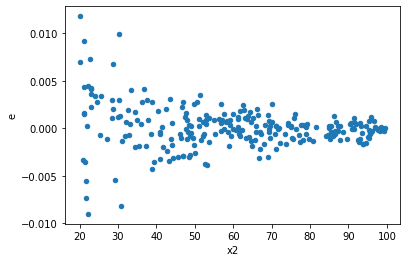

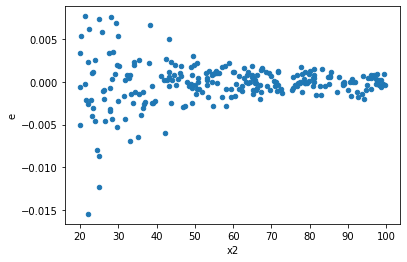

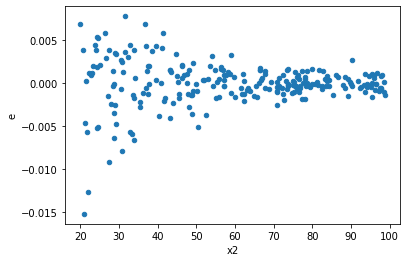

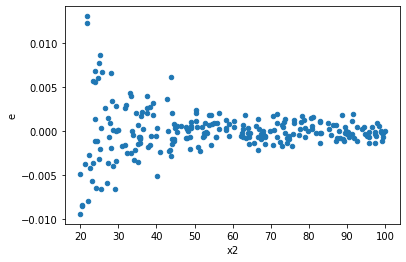

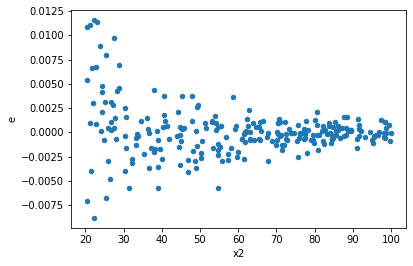

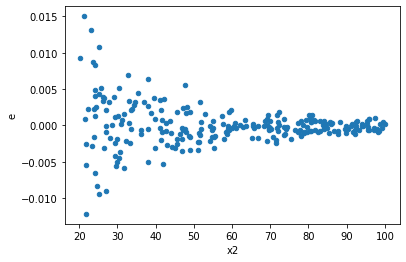

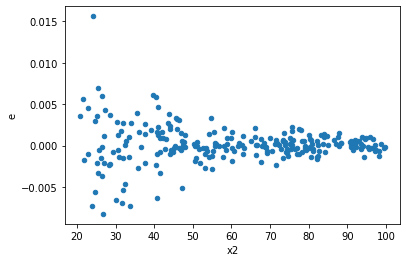

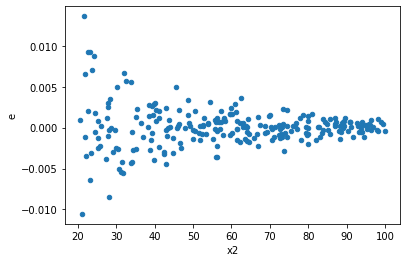

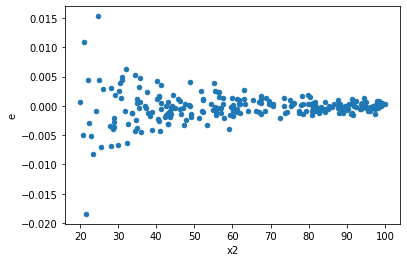

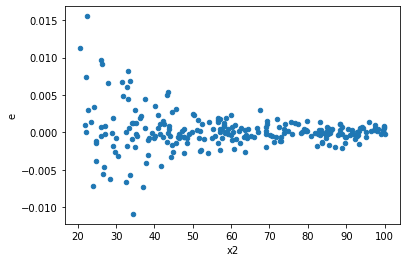

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,98.0,98.0,0.0010381808306509867,0.00013318101635379872,1.0593681945418231e-05,1.3589899627938645e-06,0.12828306247023283,4.7713516014676086e-21,Reject001=0 : Heteroscedasticity
1.0,98.0,98.0,0.0011771460629207025,0.00016170637080814982,1.2011694519599005e-05,1.6500650082464269e-06,0.13737154283719766,6.332820342426167e-20,Reject001=0 : Heteroscedasticity
2.0,98.0,98.0,0.0010059507219606326,0.00021357080784984,1.0264803285312578e-05,2.1792939576514285e-06,0.21230742539115946,2.5995629929850593e-13,Reject001=0 : Heteroscedasticity
3.0,98.0,98.0,0.0011871599303423142,0.0001704695207262088,1.2113876840227695e-05,1.7394849053694777e-06,0.14359440237934448,3.292250103128497e-19,Reject001=0 : Heteroscedasticity
4.0,98.0,98.0,0.0012100665983616758,0.00017620156004986387,1.2347618350629346e-05,1.7979751025496313e-06,0.14561310946721887,5.511169258767546e-19,Reject001=0 : Heteroscedasticity
5.0,98.0,98.0,0.0014094025616650132,0.00019035599317859217,1.4381658792500136e-05,1.9424080936591037e-06,0.13506147807317237,3.351612879392827e-20,Reject001=0 : Heteroscedasticity
6.0,98.0,98.0,0.0010059043673153769,0.00011982658680116387,1.0264330278728336e-05,1.222720273481264e-06,0.1191232394397142,2.762396965744808e-22,Reject001=0 : Heteroscedasticity
7.0,98.0,98.0,0.0009311234733134344,0.00012318818900304782,9.501259931769738e-06,1.2570223367657941e-06,0.13230059442565495,1.538251016680567e-20,Reject001=0 : Heteroscedasticity
8.0,98.0,98.0,0.0012827314710617554,0.00011281997577639494,1.30890966434873e-05,1.1512242426162749e-06,0.0879529179111903,1.4501261893420484e-27,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64